# CSCE 623 Homework Assignment 2


### Student Name:  TODD, MICHAEL, Maj, USAF 

### Date: April 18, 2022

## Simple Linear Regression

## Overview

In this homework assignment, you will conduct simple linear regression using the concepts you've learned in class and from the course ISLR and HOML texts. Using a dataset of automobile data, you will first attempt to find the y-intercept of the relationship between horsepower and miles per gallon manually using a numerical process. You will then calculate the exact solution using a closed-form analytical method and compare your results. Finally, you will use the Python `scikit-learn` (aka `sklearn`) package to fit a linear model to the data.

This assignment includes both written and programming components.



### Written Components
Answers to written components should include not only the answer to the question, but they should also include supporting information. You should provide justification or supporting information even if the question only asks for a single number or short answer.

### Programming Components
Use Python to perform any manipulations you make to provided datasets, all calculations and mathematical transformations, and to generate graphs, figures, or other support to explain how you arrived at your written answers.

### Imports (instructor provided code)

First we import common packages needed for this HW 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

import seaborn as sns

For each step, use the step-named boolean (True/False) flag to keep track for yourself about whether you have completed all of the required steps. 
These flags dont affect the operation of the program.

Initial conditions:  set all completion status of steps to False

After you believe you have completed each step, uncomment the line to set its step status to True

Example:  `STEP_00_COMPLETE = True`

Before Submission/Final Check:  
* Restart Kernel and Run all Cells to ensure your step status propagates to the final cell in the notebook
* Final check:  Ensure all the Step statuses at in the final cell of the notebook are True

In [2]:
#reset all step completion values to logical False

steplist = list(range(16))
stepnames = ['STEP_{:02d}_COMPLETE'.format(x) for x in steplist]
for s in stepnames: exec("%s = False" % (s))

def check_step_status():
    for s in stepnames:
        print(s,":",globals()[s])

check_step_status()
    

STEP_00_COMPLETE : False
STEP_01_COMPLETE : False
STEP_02_COMPLETE : False
STEP_03_COMPLETE : False
STEP_04_COMPLETE : False
STEP_05_COMPLETE : False
STEP_06_COMPLETE : False
STEP_07_COMPLETE : False
STEP_08_COMPLETE : False
STEP_09_COMPLETE : False
STEP_10_COMPLETE : False
STEP_11_COMPLETE : False
STEP_12_COMPLETE : False
STEP_13_COMPLETE : False
STEP_14_COMPLETE : False
STEP_15_COMPLETE : False


### STEP 0  (optional student coding section)


Install any packages you need for your notebook.  In general, you should avoid this for this HW since what you need has most likely been imported already.  Additionaly, if using the Google Colab environment, you should not need to install any additional packages.

In [3]:
#STUDENT SOLUTION ADDS ADDITIONAL PACKAGES...

### ------------ STUDENT CODE HERE----------------

#leave this blank if no addtional imports


### ------------ END STUDENT CODE HERE----------------

STEP_00_COMPLETE = True

### Data Analysis

In steps 1-2, you'll import and conduct an analysis of the `auto.csv` dataset.

#### STEP 1

For this assignment, you will use the auto.csv dataset located at https://raw.githubusercontent.com/afit-csce623-master/datasets/main/auto.csv.  If for some reason you dont have access to this dataset, let your instructor know as soon as possible.

This dataset includes missing values, denoted as "?". You must handle these missing values. A suggested option for this dataset is to remove observations with missing data.

Split the test and training dataset such that the training set contains 75% of the remaining data after removing NaNs
* Store the *test* dataset in a `pandas` `dataframe` called `test_df`
* Store the *training* dataset in a `pandas` `dataframe` called `train_df`.

In [4]:
#STEP 1

#STUDENT CODE - insert code to load auto.csv using pandas and preprocess it (handle missing values)
# store your data in a dataframe called 'data'

rand_seed = 0  #for reproducability during train_test_split

### ------------  STUDENT CODE HERE----------------
#load data into pandas dataframe
data = pd.read_csv("https://raw.githubusercontent.com/afit-csce623-master/datasets/main/auto.csv")
print("Data raw: \t" ,data.shape)
raw_cnt = data.shape[0]


#drop rows with NaN values if they exist
data.dropna()
print("After drop NA: \t", data.shape)
if raw_cnt > data.shape[0]:
    print("\tRemoved ",(raw_cnt - data.shape[0]), " rows")


#drop rows with incomplete data denoted by "?"
#upon inspection, only ? are in horsepower column
data = data.drop(data[(data.horsepower == '?')].index)
print("After drop ?: \t", data.shape)
if raw_cnt > data.shape[0]:
    print("\tRemoved ",(raw_cnt - data.shape[0]), " rows")


#change horsepower to int64
data['horsepower'] = data['horsepower'].astype(np.int64)
    
#split data into training (75%) and test (15%)
(train_df, test_df) = train_test_split(data, test_size=0.25, random_state=rand_seed)



### ------------ END STUDENT CODE HERE----------------|


print("\nConfirm the NaNs in the dataset are dropped by checking for missing rows")
missing_df = data[data.isna().any(axis=1)]
print(missing_df.shape[0], "rows with missing data remain\n")

#show the dataset was loaded by displaying first few rows
print("train size",train_df.shape, "test size", test_df.shape)
print("training set sample of rows:")
display(train_df.head())

STEP_01_COMPLETE = True

Data raw: 	 (397, 9)
After drop NA: 	 (397, 9)
After drop ?: 	 (392, 9)
	Removed  5  rows

Confirm the NaNs in the dataset are dropped by checking for missing rows
0 rows with missing data remain

train size (294, 9) test size (98, 9)
training set sample of rows:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
144,31.0,4,76.0,52,1649,16.5,74,3,toyota corona
247,39.4,4,85.0,70,2070,18.6,78,3,datsun b210 gx
90,12.0,8,429.0,198,4952,11.5,73,1,mercury marquis brougham
172,25.0,4,90.0,71,2223,16.5,75,2,volkswagen dasher
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls


#### STEP 2
A common first step after importing a dataset and splitting into training and test is to explore the training set. Useful `pandas` `dataframe` methods include `info`, `hist`, and `corr` as well as `scatter_matrix` in `pandas.plotting`. You may also find the `pairplot` function in the `seaborn` package to be useful.

Use Python to do the following and then answer the questions below:

1. Display statistics of the dataset.
2. Display a histogram of each of the individual feature values.
3. Choose a subset of at least 5 attributes you expect to be related to one another and display a scatterplot of each of the pairings between each possible pair of these attributes.

##### Programming


##### Train data ##################################################

DATAFRAME INFO: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 144 to 174
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           294 non-null    float64
 1   cylinders     294 non-null    int64  
 2   displacement  294 non-null    float64
 3   horsepower    294 non-null    int64  
 4   weight        294 non-null    int64  
 5   acceleration  294 non-null    float64
 6   year          294 non-null    int64  
 7   origin        294 non-null    int64  
 8   name          294 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 23.0+ KB


None


DESCRIPTIVE STATISTICS: 



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,23.352381,5.476190,194.250000,104.346939,2982.020408,15.546599,76.040816,1.561224
std,7.833296,1.694534,103.430903,38.042127,849.545761,2.798056,3.682590,0.797603
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.125000,4.000000,105.000000,77.250000,2228.500000,13.625000,73.000000,1.000000
50%,22.450000,4.000000,151.000000,95.000000,2832.500000,15.450000,76.000000,1.000000
75%,29.000000,8.000000,261.500000,125.000000,3612.000000,17.000000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.785539     -0.813176   -0.774741 -0.838648   
cylinders    -0.785539   1.000000      0.951809    0.842204  0.896294   
displacement -0.813176   0.951809      1.000000    0.890781  0.931188   
horsepower   -0.774741   0.842204      0.890781    1.000000  0.859720   
weight       -0.838648   0.896294      0.931188    0.859720  1.000000   
acceleration  0.410265  -0.488201     -0.514382   -0.670408 -0.384855   
year          0.567630  -0.343313     -0.360254   -0.396935 -0.307033   
origin        0.550500  -0.556986     -0.608453   -0.441967 -0.576887   

              acceleration      year    origin  
mpg               0.410265  0.567630  0.550500  
cylinders        -0.488201 -0.343313 -0.556986  
displacement     -0.514382 -0.360254 -0.608453  
horsepower       -0.670408 -0.396935 -0.441967  
weight           -0.384855 -0.307033 -0.576887  
acceleration      1.000000  0.281853  0.181391  

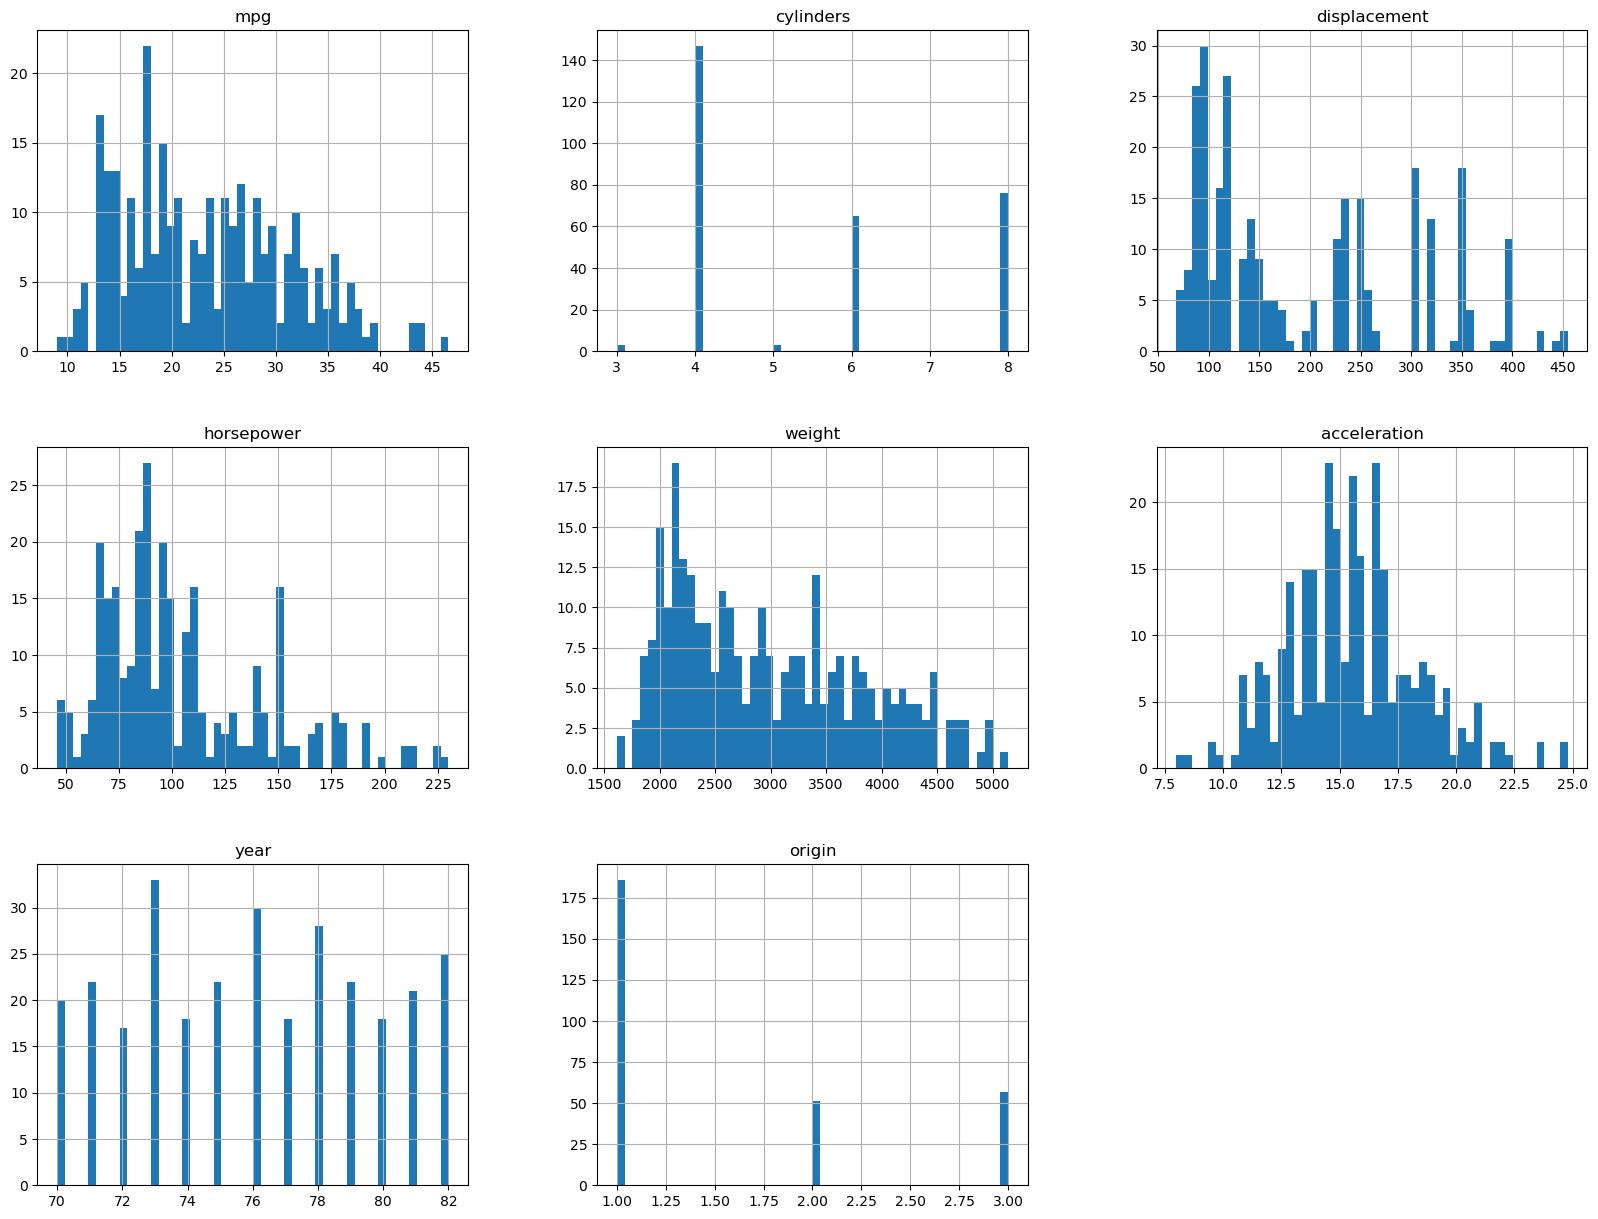

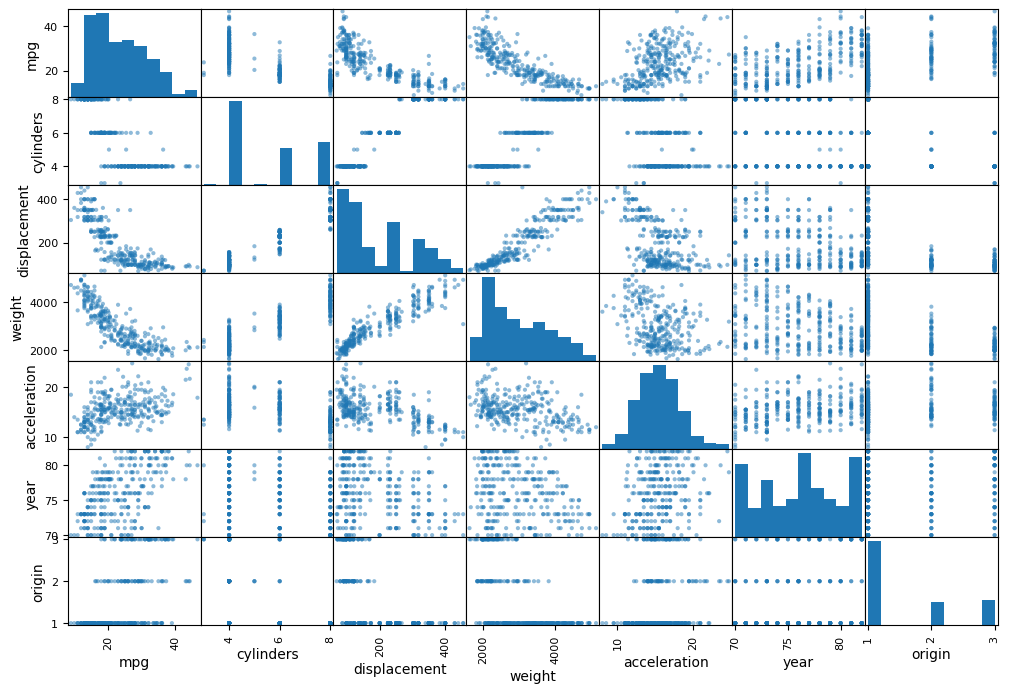

<AxesSubplot:>

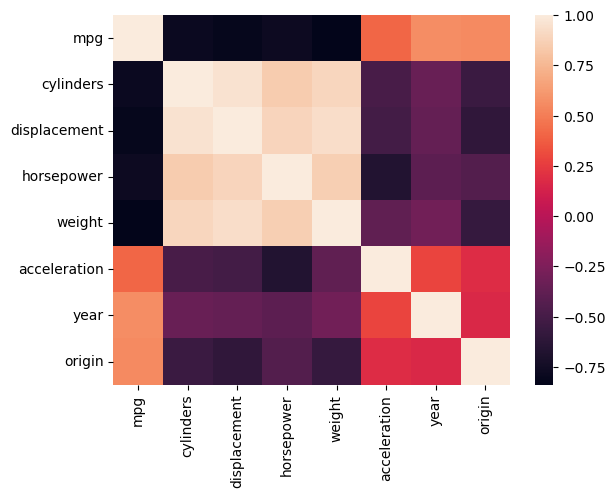

In [6]:
#STEP 2

#STUDENT CODE - Insert code to explore the dataset here
### ------------  STUDENT CODE HERE----------------
print("\n##### Train data ##################################################")

# show frame information
print("\nDATAFRAME INFO: \n")
display(train_df.info())

# show data statistics 
print("\nDESCRIPTIVE STATISTICS: \n")
display(train_df.describe())

# show correlation matrix 
corr_matrix = train_df.corr()
corr_matrix["mpg"].sort_values(ascending=False)
print(corr_matrix, "\n")

# Show historgram for our data
train_df.hist(bins=50, figsize=(20,15))
#plt.savefig("images/hw2/attribute_histogram_plots")
plt.show()

attributes = ["mpg", "cylinders", "displacement", "weight", "acceleration", "year", "origin"]
scatter_matrix(train_df[attributes], figsize=(12, 8))
#plt.savefig("images/hw2/scatter_matrix_plot")
plt.show()

# plot the heatmap
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

#print("\n##### Test data ##################################################")
#print("\nDATAFRAME INFO:")
#test_df.info()

#Display the statisttics 
#print("\nDESCRIPTIVE STATISTICS: \n", test_df.describe())

### ------------ END STUDENT CODE HERE----------------



##### <font color='blue'>Written Responses</font>

1. How many observations/datapoints are there?
   
   <font color='green'>There are 333 training observations and 59 test obserations in this dataset. </font>


2. How many features/attributes are there per observation? Describe these features in terms of type of data (feature/response and numerical/categorical)
   
   <font color='green'> There are a total of 9 features, with data types of float64(3) [mpg, displacement, accceleration], int64(5) [cylinders, weight, year, origin, horsepower], and object(1) [name], as shown below. Horsepower was manually converted after cleaning data.</font>


3. Describe the distribution of each feature in terms of statistical descriptions (e.g., uniform, normal/Gaussian, exponential, skewed, multi-modal).

<font color='green'>
<ol>
  <li><b>MPG</b> is slightly skewed right (positive).</li>
  <li><b>Acceleration</b> is approximately normally distributed. </li>
  <li><b>Displacement</b> multi-modal, as we see two clear maxima in the distribution.</li>
  <li><b>Horsepower</b> and <b>Weight</b> are skewed right.</li>
  <li><b>Year</b> is approximately evenly distributed across all year groups.</li>
  <li><b>Cylindars</b> and <b>Origin</b> are skewed right.</li>
</ol>   
</font>

4. Describe the attributes you chose for relational analysis in terms of weak- and strong-relationships, linear and non-linear relationships, and positive and negative correlations.

<font color='green'> For this dataset, I selected the following features for our model:</font>
<ol><font color='green'>
  <li><b>Cylinders</b>has a strong relationship with MPG -0.785539 and is highly coorelated with displacement, horsepower and weight.</li>
    <li><b>Displacement</b> has a strong relationship with MPG -0.813176  and is highly cooreleated with cylinders, horsepower, and weight.</li>
    <li><b>Horsepower</b>has a strong relationship with MPG -0.774741 and is also highly coorelated with cylinders, displacement, and weight.</li>
    <li><b>Weight</b> has a strong relationship with MPG -0.838648 and is also highly coorelated with cylinders, displacement, and horsepower.</li>
    <li><b>Year</b> has a strong relationship with MPG 0.567630 and a medium correlation with cylinders, displacement, horsepower and weight.</li>
</ol></font>

<font color='green'>Year is the only positively correlated feature selected for this model. All other predictors variables are negatively correlated to MPG. This is intuitive, as we expect to see better gas milage over the years, but if the engin is too powerful (more displacement, HP) or is too heavy, the MPG will go down.</font>



In [7]:
STEP_02_COMPLETE = True

### Find optimal $\beta_1$ value

In steps 3-7, you'll find an optimal $\beta_1$ value assuming $\beta_0$ = 40.

#### STEP 3
Make a single scatterplot of horsepower (x axis) by MPG (y axis). use `matplotlib` `pyplot`'s `scatter` function.  Ensure your x and y axis lables are labeled, tickmarks are reasonable and the title of the graph is correct.

Set the axes so that the origin (0,0) is included, as well as all of the datapoints. Label axes appropriately, "Horsepower" and "MPG"). 

Assuming the relationship between Horsepower and MPG is linear and $\beta_0$ (y-intercept) is fixed at 40, estimate a value of `beta1guess` (slope) from a visual inspection of the scatterplot.

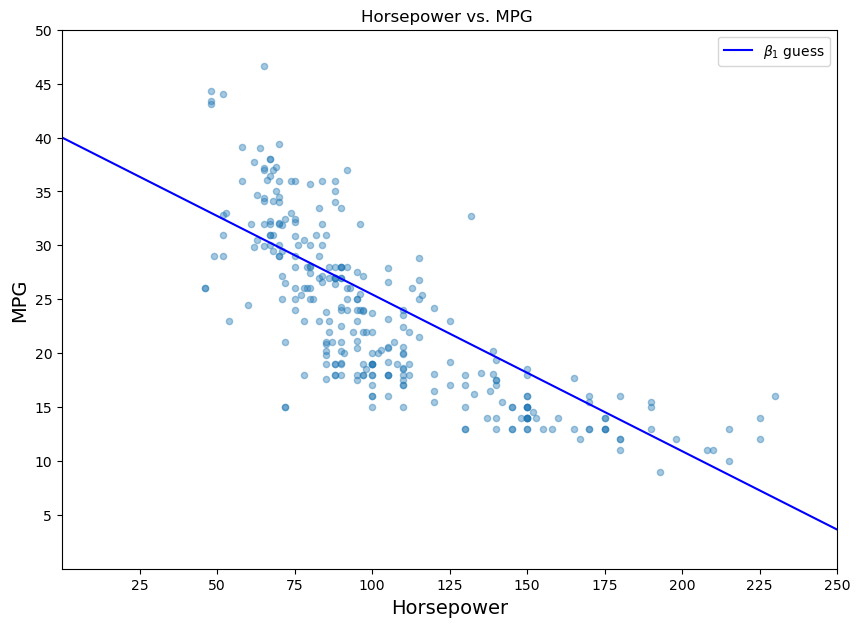

In [8]:
#STEP 3

beta0init = 40.  #dont change this initialization value in this step

#STUDENT CODE - Make a single scatterplot of horsepower (x axis) by MPG (y axis) 
# Insert the value of beta1guess based on eyeballing the graph
### ------------ STUDENT CODE HERE----------------

# set hp to training hp 
hp = train_df['horsepower']

# set ys to training mpg
ys = train_df['mpg']

# build plot
hp_mpg_plt = train_df.plot(kind="scatter", x="horsepower", y="mpg", figsize=(10,7), alpha=0.4)                  

# plot my guess 
plt.plot([0, 275],[40, 0], 'b', label=r'$\beta_1$ guess' )

# set title and labels
plt.ylabel("MPG", fontsize=14)
plt.xlabel("Horsepower", fontsize=14)
plt.title("Horsepower vs. MPG ")
plt.legend()

# set axis details
plt.xlim([0,250])
plt.ylim([0,50])
plt.xticks(np.linspace(25, 250, 10))
plt.yticks(np.linspace(5,50,10))

# show plot
plt.show()

#My beta1 guess was decided based on starting at 40 and drawing a straight line down to the X-axis through our data.
# So I approximate the slope is -40/275 = -0.145454545. 
beta1guess = -0.145454545


### ------------ END STUDENT CODE HERE----------------


md(r"Guess for $\beta_1$ = %f" %beta1guess)

STEP_03_COMPLETE = True

#### STEP 4
Make a `numpy` array of possible $\beta_1$ values named `beta1bracket` that surround your `beta1guess` value. Do not hard code your values. Instead, use code. You may find the `numpy` `arange` or the `linspace` functions useful.

In [9]:
#STEP 4

#STUDENT CODE - Insert code to make a set of possible beta1 values to test & display the values you chose

beta1bracket = None #placeholder
### ------------  STUDENT CODE HERE----------------

beta1bracket = np.arange(-.15, -.17, -0.0001, dtype=float)

### ------------ END STUDENT CODE HERE----------------

print(beta1bracket)
STEP_04_COMPLETE = True

[-0.15   -0.1501 -0.1502 -0.1503 -0.1504 -0.1505 -0.1506 -0.1507 -0.1508
 -0.1509 -0.151  -0.1511 -0.1512 -0.1513 -0.1514 -0.1515 -0.1516 -0.1517
 -0.1518 -0.1519 -0.152  -0.1521 -0.1522 -0.1523 -0.1524 -0.1525 -0.1526
 -0.1527 -0.1528 -0.1529 -0.153  -0.1531 -0.1532 -0.1533 -0.1534 -0.1535
 -0.1536 -0.1537 -0.1538 -0.1539 -0.154  -0.1541 -0.1542 -0.1543 -0.1544
 -0.1545 -0.1546 -0.1547 -0.1548 -0.1549 -0.155  -0.1551 -0.1552 -0.1553
 -0.1554 -0.1555 -0.1556 -0.1557 -0.1558 -0.1559 -0.156  -0.1561 -0.1562
 -0.1563 -0.1564 -0.1565 -0.1566 -0.1567 -0.1568 -0.1569 -0.157  -0.1571
 -0.1572 -0.1573 -0.1574 -0.1575 -0.1576 -0.1577 -0.1578 -0.1579 -0.158
 -0.1581 -0.1582 -0.1583 -0.1584 -0.1585 -0.1586 -0.1587 -0.1588 -0.1589
 -0.159  -0.1591 -0.1592 -0.1593 -0.1594 -0.1595 -0.1596 -0.1597 -0.1598
 -0.1599 -0.16   -0.1601 -0.1602 -0.1603 -0.1604 -0.1605 -0.1606 -0.1607
 -0.1608 -0.1609 -0.161  -0.1611 -0.1612 -0.1613 -0.1614 -0.1615 -0.1616
 -0.1617 -0.1618 -0.1619 -0.162  -0.1621 -0.1622 -0.

#### STEP 5a

Create a function `rss1d(beta0, beta1, x, y)` to compute the sum of squared residuals (RSS) for a given $\beta_0$ and $\beta_1$ and a vector of input features `x` and target values `y`. You may assume that `x` and `y` are each single vector arrays (in this case, `pandas` Series).

In [10]:
#STEP 5


#rssbeta1 = None

def rss1d(beta0, beta1, x, y):
    '''compute the sum of squared residuas for a given beta_0 and beta_1 over a vector of input features x and target values y'''
    
    function_output = None #placeholder for the output of your function
    
    #remember to indent your code for the function internals
    ### ------------  STUDENT CODE HERE----------------

    # sum of actual-predicted^2
    function_output = np.sum(np.square(y - (beta1*x + beta0)))
    
    ### ------------ END STUDENT CODE HERE----------------
    
    return function_output

   
    

#### STEP 5b

Then, call the function function created abover to compute the RSS for the fixed `beta0init` value (40) and for each member of the `beta1bracket` vector you created in STEP 4. Store these RSS values in a `numpy` array named `rssbeta1`.

In [11]:
#STUDENT CODE - Insert code to compute the sum of squared residual errors (RSS) under each possible beta1bracket member.

rssbeta1 = [] #placeholder for your code to store the result

### ------------  STUDENT CODE HERE----------------

# setup rssbeta1 before iterating
rssbeta1 = np.zeros(len(beta1bracket))

# get rss using rss1d from step 5
for idx, entry in enumerate(beta1bracket):
    rssbeta1[idx] = rss1d(beta0init, beta1bracket[idx], train_df['horsepower'], train_df['mpg'])

#### ------------ END STUDENT CODE HERE----------------
    

STEP_05_COMPLETE = True

#### STEP 6

Make a new plot of $\beta_1$ values on the x axis and the RSS values you calculated in STEP 5 on the y axis (computed in step 5). Label your axes and use math fonts in your labels.

Use the `numpy` function `argmin` to find the $\beta_1$ value having the smallest RSS. Store this value in a variable named `beta1min`.

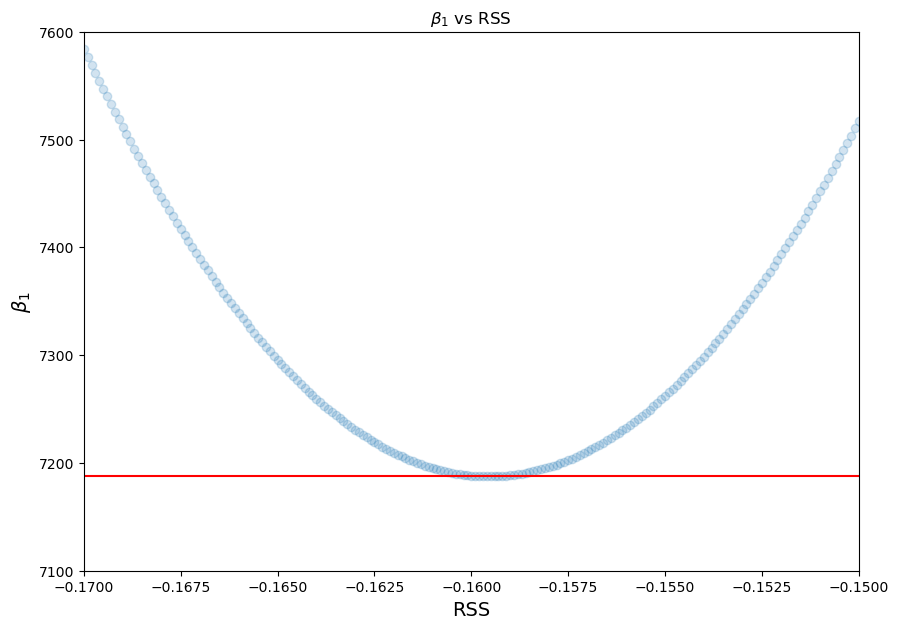

beta1 = -0.15949999999999895  RSS =  7187.4424364999995


In [12]:
#STEP 6

#STUDENT CODE - make a new plot of beta_1 values on the x axis and RSS cost on the y axis (computed in step 5). 
#label your axes and use math fonts in your labels if possible
#find the beta1 value having the smallest RSS, and assign this value to beta1min


beta1min = None #placeholder

### ------------  STUDENT CODE HERE----------------

# get min coefficnect and value
beta1min = beta1bracket[np.argmin(rssbeta1)]
beta1val = rssbeta1[np.argmin(rssbeta1)]
beta1max = beta1bracket[np.argmax(rssbeta1)]
beta1valmax = rssbeta1[np.argmax(rssbeta1)]

beta1bracket_min = np.argmin(beta1bracket)
beta1bracket_max = np.argmax(beta1bracket)

# set figure size
plt.figure(figsize=(10,7))

# build plot
beta1_rss_plt = plt.scatter(beta1bracket, rssbeta1, alpha=0.2)                  

# add line to indicate lowest value
plt.axhline(y = beta1val, color = 'r', linestyle = '-')

# set title and labels
plt.title(r'$\beta_1$ vs RSS')
plt.ylabel(r'$\beta_1$', fontsize=14)
plt.xlabel("RSS", fontsize=14)

# set axis details
plt.xlim([-.17, -.15])
plt.ylim([7100, 7600])

# show plot
plt.show()

# print for effect 
print("beta1 =", beta1min, " RSS = ", beta1val)

### ------------ END STUDENT CODE HERE----------------

STEP_06_COMPLETE = True

#### STEP 7

Describe the RSS plot you created in STEP 6 by answering the following questions.

1. What is the shape of the plot in STEP 6?  
  
  <font color='green'>The shape in part 6 is a parabola. </font>


2. Using the plot, how might someone find the best value of $\beta_1$:  
  
  <font color='green'>Since we are using RSS to find our best parameter, we simply take the minima as our best $\beta_1$ value.</font>


3. Select & report value of $\beta_1$ you think will have the best fit. Note that you may need to improve your estimate in STEP 3 or add additional $\beta_1$ values in `beta1bracket` in STEP 4, then repeat steps 5 and 6. Assuming the range of values in `beta1bracket` have sufficient granularity and contain an optimal $\beta_1$ value, you may find the use of the `numpy` function `argmin` will be helpful to find the $\beta_1$ value having the smallest RSS value.

  <font color='green'> Narrowing to $-0.17$ to $-0.15$, we see our best estimate is $\beta_1 = -0.15949$ </font>



In [13]:
STEP_07_COMPLETE = True

### Evaluate $\beta_1$ value

In steps 8-12, you'll evaluate the $\beta_1$ value you discovered in steps 3-7 and compare it to the closed form solution.*italicized text*

#### STEP 8
Build a new scatterplot with horsepower(x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Add a line to the plot - the linear regression line in red implied by the fixed $\beta_0 = 40$ (`beta0init`) and your best choice for $\beta_1$ (`beta1min`). Label your linear regression line, "1st order fitted line" in the legend.

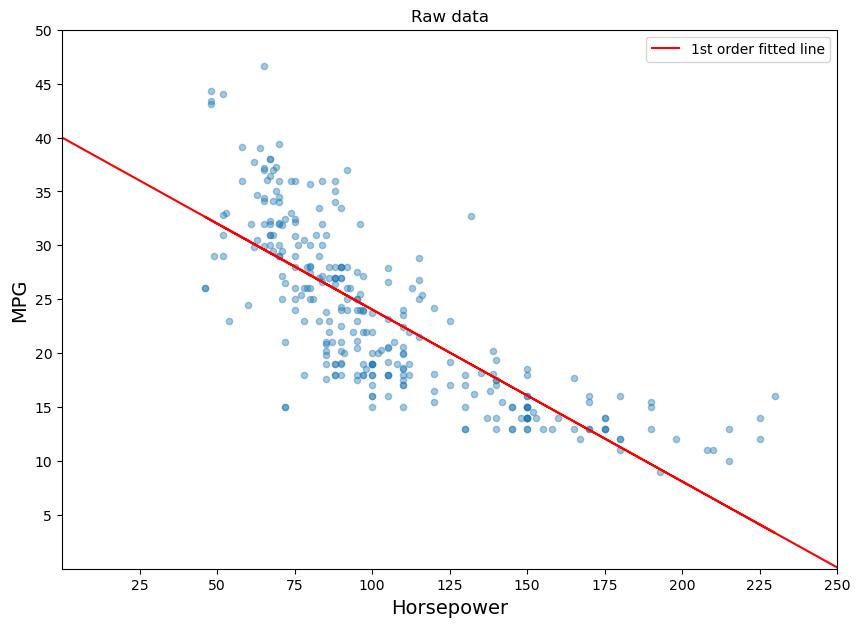

In [14]:
#STEP 8

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the fixed beta0init=40 and your best choice for beta1 

### ------------ STUDENT CODE HERE----------------

# set hp to training hp 
hp = train_df['horsepower']

# set ys to training mpg 
ys = train_df['mpg']

# set predicted valeus using beta0init and beta1min from previous steps
best_reg_est = beta0init + beta1min*hp

# build plot
raw_plt = train_df.plot(kind="scatter", x="horsepower", y="mpg", figsize=(10,7), alpha=0.4)                  

# plot regression line using best_reg_est
plt.plot(hp,best_reg_est, 'r', label='1st order fitted line')

#add line to fill gap on top and bottom
plt.plot([0,50],[40,beta0init + beta1min*50],'r')
plt.plot([225,252],[beta0init + beta1min*225,beta0init + beta1min*252],'r')

# set title and labels
plt.ylabel("MPG", fontsize=14)
plt.xlabel("Horsepower", fontsize=14)
plt.title("Raw data")
plt.legend()

# set axis details
plt.xlim([0,250])
plt.ylim([0,50])
plt.xticks(np.linspace(25, 250, 10))
plt.yticks(np.linspace(5,50,10))

# show plot
plt.show()

### ------------ END STUDENT CODE HERE----------------


STEP_08_COMPLETE = True

#### STEP 9
Implement equation 3.4 on page 62 to develop the closed-form function `computeBetas(xVec, yVec)` 
which accepts a column vector of x values and a column vector of y values and returns betas, 
which is a structure containing the values for the 2 coefficients $\beta_0$ and $\beta_1$  

In [15]:
#STEP 9

#STUDENT CODE - In code, implement equation 3.4 on page 62 to develop the closed-form function computeBetas(xVec, yVec) 
# which accepts a column vector of x values and a column vector of y values and returns betas, 
# which is a structure containing the values for the 2 coefficients beta0 and beta1  

def computeBetas(xVec, yVec):
    function_output = None #placeholder

### ------------  STUDENT CODE HERE----------------

    # add 1 to front of x vector for b0
    X_mat=np.vstack((np.ones(len(xVec)), xVec)).T
               
    # calcualte using matrix equation from eq 3.4 page 62 of ISLR
    betas_cf = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(yVec)

### ------------ END STUDENT CODE HERE----------------

    return betas_cf

STEP_09_COMPLETE = True

In the `computeBetasMatrixForm` function above I used the matrix form of Equation 3.4 on page 62 of ISLR. The equation is $\mathbf{b} = \left(\mathbf{X}'\mathbf{X}\right)^{-1}\mathbf{X}'\mathbf{Y}$ and comes from Equation 5.60 on page 200 of _Applied Linear Statistical Models, 5th ed._ by Kutner, Nachtsheim, Neter, and Li. It is the book used in Math 696, Applied General Linear Models. The matrix form calculates the betas approximately 9% faster than the non-matrix form.

#### STEP 10
Compute and display the best $\beta_0$ and $\beta_1$ for the auto dataset by calling the closed-form function in step 9

In [16]:
#STEP 10
#STUDENT CODE - Compute and display beta0 and beta1 for the auto dataset by calling the closed-form function in step 9

### ------------  STUDENT CODE HERE----------------

# call computeBetas from step 9
betas_cf = computeBetas(hp,ys)

# for later use in part 12
beta0 = betas_cf[0]
beta1 = betas_cf[1]

# print closed form equation
print("The closed form function for this model is:")
print("y_hat = ", betas_cf[0], " - ", -1*betas_cf[1],"x_i")

### ------------ END STUDENT CODE HERE----------------


STEP_10_COMPLETE = True

The closed form function for this model is:
y_hat =  39.998611679300545  -  0.15952773432799916 x_i


#### STEP 11

How does the closed form computed value of $\beta_1$ compare with your estimate of $\beta_1$ from step 6? 

<font color='green'> My step 6 estimate was beta1 = -0.15849999999999906, which is a 0.013045455 difference from the closed solution. Therefore I believe my estimate was very good. </font>



In [36]:
STEP_11_COMPLETE = True

#### STEP 12
Build a new scatterplot of the training data with horsepower(x axis) vs MPG (y axis). 

* Label your scatterplot data, "Raw data".
* Add a <font color="green">green</font> linear regression line formed by the closed form beta values you determined in STEP 10. 
* Label your linear regression line, "1st order closed-form fit".
* Add axis labels and a title


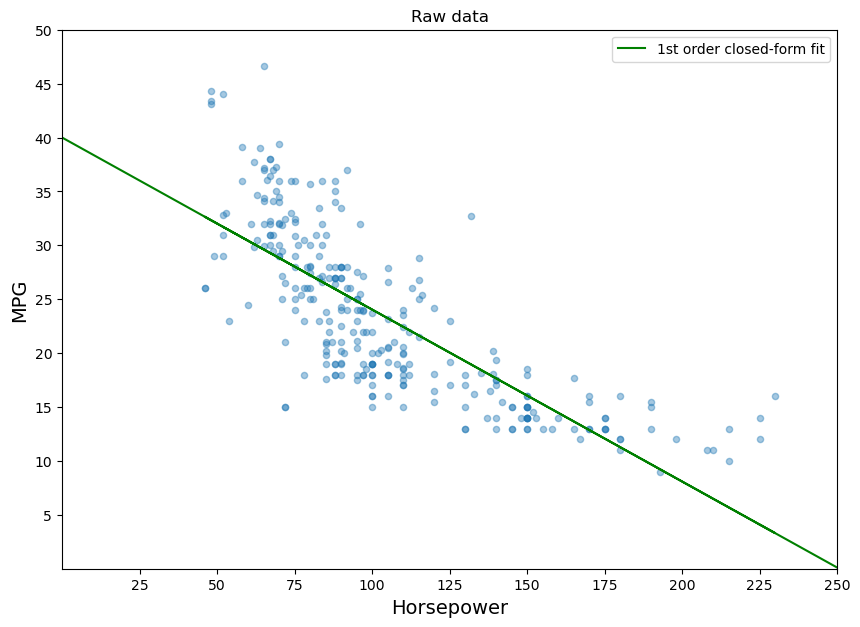

In [17]:
#STEP 12

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the beta0 and beta1 you determined in step 10 

### ------------ STUDENT CODE HERE----------------

# set hp to training hp 
hp = train_df['horsepower']

# set ys to training mpg 
ys = train_df['mpg']

# use beta0 and beta1 from step 11 to compute closed form predicted values
closed_form_reg = beta0 + beta1*hp

# build plot
raw_plt = train_df.plot(kind="scatter", x="horsepower", y="mpg", figsize=(10,7), alpha=0.4)                  

# plot regression line using prediction from closed form regression
plt.plot(hp,closed_form_reg, 'g', label='1st order closed-form fit')

# add line to fill gap on top and bottom of our line
plt.plot([0,50],[40,beta0 + beta1*50],'g')
plt.plot([225,252],[beta0 + beta1*225,beta0 + beta1*252],'g')

# set title and labels
plt.title("Raw data")
plt.ylabel("MPG", fontsize=14)
plt.xlabel("Horsepower", fontsize=14)
plt.legend()

# set axis details
plt.xlim([0,250])
plt.ylim([0,50])
plt.xticks(np.linspace(25, 250, 10))
plt.yticks(np.linspace(5,50,10))

# show plot
plt.show()

### ------------ END STUDENT CODE HERE----------------


STEP_12_COMPLETE = True

### Fit model using `sklearn`

#### STEP 13
Use `sklearn`'s `linear_model` function to fit a linear model from horsepower to mpg. Store your model in a variable named `mpg_hp_model`. Using the model's accessors, obtain the coefficients and store them in `beta0` and `beta1`.

On the *test set*, compute the explained variance score, and MSE, store the values in variables names  `r2`, and `mse`. Display each of these values.

Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [18]:
#STEP13

#STUDENT CODE - Use sklearn's linear model function to fit a linar model from horsepower to mpg. 
# also, display the coefficients, MSE and explained variance score

mpg_hp_model= None #placeholder for the linear model from sklearn

# placeholders for extracted values from sklearns linear model
beta0 = 0
beta1 = 0
# placeholders for computed performance values
r2 = 0
mse = 0

### ------------ STUDENT CODE HERE----------------

# set X from train data horsepower
X = train_df.loc[:, ['horsepower']]

# set y from train data mpg
y = train_df['mpg']

# build model using sklearn.linear_model
mpg_hp_model = linear_model.LinearRegression()

# fit model using training hp and mpg
mpg_hp_model.fit(X, y)

# make predictions using the TEST data
y_test_pred = mpg_hp_model.predict(test_df.loc[:, ['horsepower']])

# get observed mpg from TEST data
test_y = test_df['mpg']

# mean squared error for TEST data
mse = mean_squared_error(test_y, y_test_pred)

# r2 score for TEST data
r2 = explained_variance_score(test_y, y_test_pred)

#beta1
beta1 = mpg_hp_model.coef_

#beta0 
beta0 = mpg_hp_model.intercept_

### ------------ END STUDENT CODE HERE----------------

display(md(r'$\beta_0 =$ %f' %beta0))
display(md(r'$\beta_1 =$ %f' %beta1))
display(md(r'Test Set $R^2 =$ %f' %r2))
display(md(r'Test Set $MSE =$ %f' %mse))

STEP_13_COMPLETE = True

$\beta_0 =$ 39.998612

$\beta_1 =$ -0.159528

Test Set $R^2 =$ 0.625204

Test Set $MSE =$ 22.501345

#### STEP 14
Using the *test set* data, build a new scatterplot with horsepower (x axis) vs MPG (y axis). Label your scatterplot data, "Raw data".

Create a new plot with a black linear regression line computed by the `sklearn` model fitted in STEP 13.

C:\Users\codeh\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


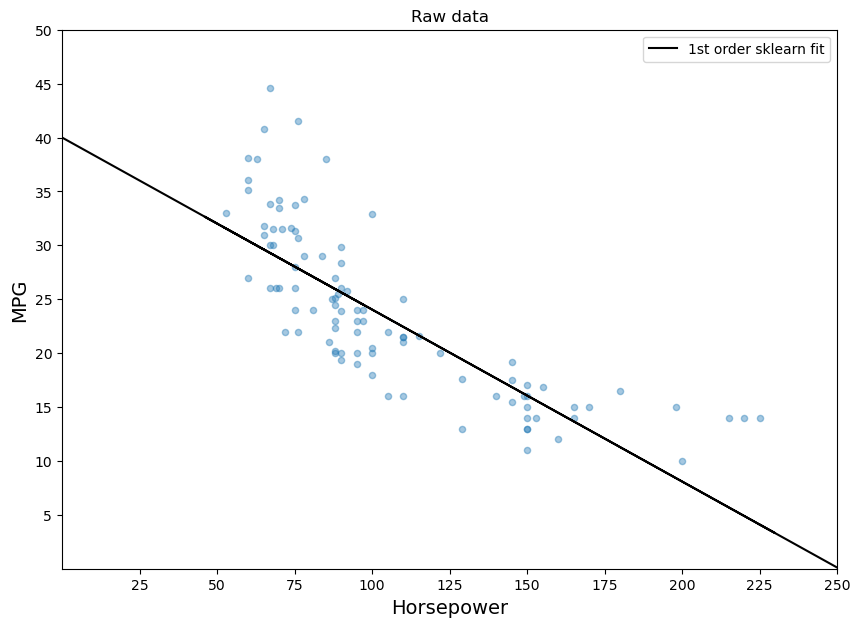

In [19]:
#STEP 14

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the sklearn model determined in step 13 

### ------------ STUDENT CODE HERE----------------

#get hp test array
hp_tst = test_df['horsepower']

#get mpg observed array
ys_tst = test_df['mpg']

#get predicted values from sklearn model
sklearn_reg = beta0 + beta1*hp_tst

#build plt for raw data
raw_plt = test_df.plot(kind="scatter", x="horsepower", y="mpg", figsize=(10,7), alpha=0.4)                  

#set title and labels
plt.ylabel("MPG", fontsize=14)
plt.xlabel("Horsepower", fontsize=14)
plt.plot(hp,closed_form_reg, 'k', label='1st order sklearn fit')

#set axis details
plt.xlim([0,250])
plt.ylim([0,50])
plt.title("Raw data")
plt.xticks(np.linspace(25, 250, 10))
plt.yticks(np.linspace(5,50,10))
plt.legend()

#add line to fill gap on top
plt.plot([0,50],[40,beta0 + beta1*50],'k')
plt.plot([225,252],[beta0 + beta1*225,beta0 + beta1*252],'k')

#show plot
plt.show()

### ------------ END STUDENT CODE HERE----------------

STEP_14_COMPLETE = True

## STEP 15a:
Compute the residual errors in predicting MPG from horsepower using the ```sklearn``` model.  Plot these residual errors as a function of horsepower using a scatterplot.  Add a red horizontal line at y=0 to indicate the zero-error position.

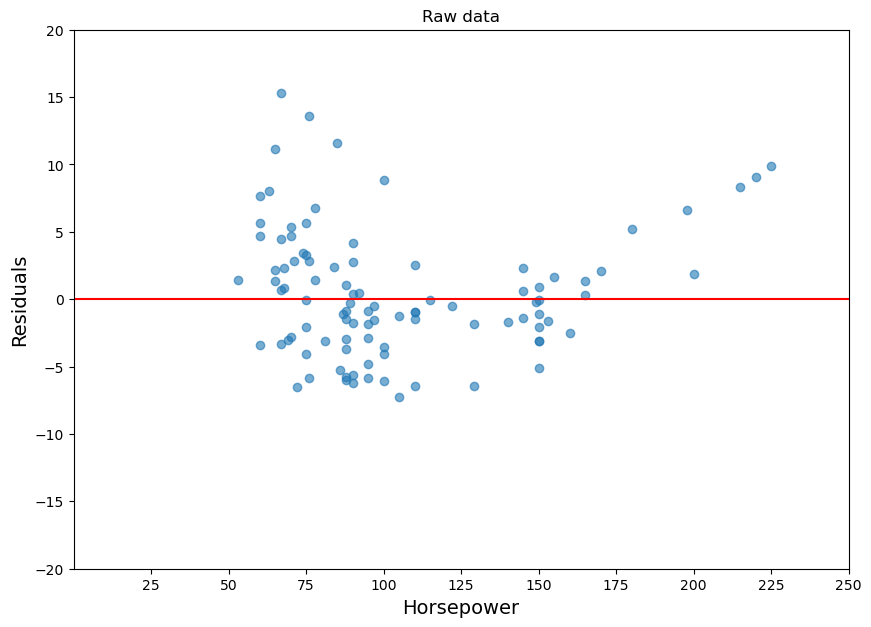

In [20]:
#STUDENT CODE

### ------------ END STUDENT CODE HERE----------------

#get residuals from actual - predicted
test_resid = test_y - y_test_pred

#get test hp data
hp_tst = test_df['horsepower']

#set figure size
plt.figure(figsize=(10,7))

#build plt
resid_plt = plt.scatter(hp_tst, test_resid, alpha=0.6)   

#set title and labels
plt.title("Raw data")
plt.ylabel("Residuals", fontsize=14)
plt.xlabel("Horsepower", fontsize=14)

#set axis details
plt.xlim([0,250])
plt.ylim([-20,20])
plt.xticks(np.linspace(25, 250, 10))
plt.yticks(np.linspace(-20,20,9))

#add lines
plt.axhline(y = 0, color = 'r', linestyle = '-')

#show plot
plt.show() 

### ------------ END STUDENT CODE HERE----------------

      

## STEP 15b

Describe the plot. Do the errors appear well-distributed, or are there trends in the residuals? If there are trends, explain what these trends indicate about the ability to predict mpg from horsepower using a linear model, and give at least one course of action you could take to make a better model.

<font color='green'>The residuals are not evenly distributed as they should be to indicate constance variance. Since this does not exist, we could apply a transform such as log(mpg). Since we only achived an R2 of approximately .63, only 63% of the variance is explained by this model. I would include other predictor variables in this model such as cylinders, displacement, weight, and year. </font>

<font color="green">The plot shows the residuals of the fit of mpg estimated from the horsepower feature. The data is heavily represented in lower horsepowers, as discussed above, but it is apparent there is a distinct curvature to the residuals, indicating there may be non-linearity in the relationship between mpg and horsepower. Due to this curvature, it is somewhat difficult to analyze the homoscedasticity of the data, though it appears there may be less variance as the horsepower increases. This finding is obfuscated by the left-skewedness of the distribution. To address these concerns, I would first include a second order term relating mpg and horsepower into the model. Then, I would reexamine the residuals. If heteroscedasticity remains, the data may need to be transformed prior to the model fitting process in order to not invalidate further inference.</font>



In [21]:
STEP_15_COMPLETE = True

## STEP 16 (Optional)
Optional (not required, but good practice in developing your coding skills):  build a structure containing possible values for $\beta_0$ and $\beta_1$ pairs.   Compute the RSS over all beta pairs at each cell in the matrix on the horsepower vs. MPG data.  Now build a contour and/or 3D plot of these RSS values as shown in the book Figure 3.2 on page 63 (the x and y axes are $\beta_0$ and $\beta_1$ and the z axis is RSS).   On your contour/3D plot, add a point at the location of the best $\beta_0$, $\beta_1$ coordinates which minimize the RSS.

Hint:  `numpy` `meshgrid` may be helpful here (https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.htmlhttps://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

Hint:  `bb0` and `bb1` are provided as the ideal best beta coefficients - center your contour plot on these values

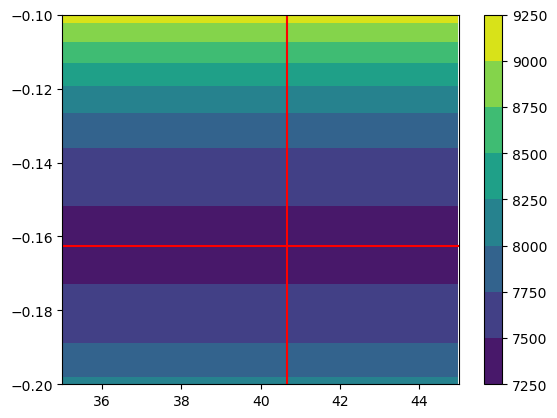

In [22]:
#STUDENT CODE


bb0=40.670412  #found best beta0 
bb1= -0.162513  #found best beta1


### ------------  STUDENT CODE HERE----------------

#beta_paris 
b0s = np.arange(35, 45, 0.03407155, dtype=float)
b1s = np.arange(-.1, -.2, -0.000340716, dtype=float)

#get predicted to compute rss
predicted = mpg_hp_model.predict(train_df.loc[:, ['horsepower']])

#setup rss structure
rss_list = np.zeros((len(b0s), len(predicted)))

#populate rss structure
for idx, entry in enumerate(b0s):
    rss_list[idx] = rss1d(b0s[idx], b1s[idx], train_df['horsepower'], train_df['mpg'])

#create meshgrid
b0X,b1Y = np.meshgrid(b0s, b1s)

#build contour plot
ctor = plt.contourf(b0X, b1Y, rss_list)

#set axis details

plt.xlim([35,45])
plt.ylim([-0.2,-0.1])
plt.plot(bb0, bb1, color='r', linestyle='--', label='Best Betas')

#add lines to indiate best betas
plt.axhline(y = bb1, color = 'r', linestyle = '-', label="Best Beta")
plt.axvline(x = bb0, color = 'r', linestyle = '-')

#show color bar on side
plt.colorbar()

#show plot
plt.show()

### ------------ END STUDENT CODE HERE----------------







In [23]:
check_step_status()


STEP_00_COMPLETE : True
STEP_01_COMPLETE : True
STEP_02_COMPLETE : True
STEP_03_COMPLETE : True
STEP_04_COMPLETE : True
STEP_05_COMPLETE : True
STEP_06_COMPLETE : True
STEP_07_COMPLETE : True
STEP_08_COMPLETE : True
STEP_09_COMPLETE : True
STEP_10_COMPLETE : True
STEP_11_COMPLETE : False
STEP_12_COMPLETE : True
STEP_13_COMPLETE : True
STEP_14_COMPLETE : True
STEP_15_COMPLETE : True
